# Sales Analysis

#### By- Onkar Bhise [LinkedIn](https://www.linkedin.com/in/onkar-b-3570b71b8/)

**In this project, I utilized the Pandas and Matplotlib libraries to conduct an in-depth analysis and derive insights regarding a year's worth of sales data from an electronics store. The dataset comprises a substantial volume of purchase records, categorized by month, product type, cost, purchase address, and more.**

Commencing with data preprocessing, I performed the following tasks:

1. Eliminated rows with missing values (NaN) from the DataFrame.
2. Excluded rows containing irrelevant or erroneous data.
3. Adjusted column data types using functions such as `to_numeric` and `to_datetime`.

With a cleaner dataset in hand, I transitioned into the data exploration phase. Within this segment, I addressed five key business inquiries tied to our data:

1. **Optimal Sales Month:** Determined the month with the highest sales figures and computed the corresponding revenue.
2. **Top-Selling City:** Identified the city that recorded the highest product sales volume.
3. **Strategic Advertisement Timing:** Explored the best time to display advertisements to maximize the likelihood of customer purchases.
4. **Frequently Sold Together Items:** Detected which products are commonly purchased together by customers.
5. **Best-Selling Product:** Identified the product with the highest sales volume and formulated potential reasons for its success.

To address these inquiries, I leveraged various Pandas and Matplotlib functions, including but not limited to:

- Merging multiple CSV files using `pd.concat` to generate a consolidated DataFrame.
- Introducing new columns to the dataset.
- Extracting relevant information from cells through string manipulation using `.str` methods.
- Employing the `.apply()` method to perform custom calculations.
- Utilizing the `groupby` function to aggregate data for analysis.
- Generating informative visualizations such as bar charts and line graphs to illustrate findings.
- Enhancing visualizations with appropriate labeling.

By undertaking this systematic approach, I aimed to extract actionable insights from the sales data, thereby facilitating strategic decision-making and a deeper understanding of the business landscape.

### Compiling Monthly Sales Data into a Single File

In this step, I will compile the sales data for each month of the year 2019 into a single consolidated file. By merging the data from all twelve months, I will create a comprehensive dataset that offers a complete overview of the entire year's sales performance.

This merged dataset will form the core foundation for the subsequent phases of analysis. It will empower me to extract insightful information, unveil patterns, and derive valuable conclusions that can steer strategic business decisions.

To accomplish this, I will utilize the Pandas library in Python to efficiently handle and merge the monthly data files. Let's dive into the data and begin the process of uncovering meaningful insights from the sales data.


In [3]:
import pandas as pd
import os
import glob

notebook_directory = os.getcwd()  
path = os.path.join(notebook_directory, '*.csv')

all_files = glob.glob(path)

df_list = []

for filename in all_files:
    df = pd.read_csv(filename)
    df_list.append(df)

concatenated_df = pd.concat(df_list, ignore_index=True)

concatenated_df.to_csv('all_data.csv', index=False)

In [4]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [5]:
import warnings
warnings.filterwarnings("ignore")

### Removing NaN, Garbage Values from the Data and converting data in suitable data types.

In this step, I will focus on data cleaning by addressing missing or erroneous values in the dataset. These could be in the form of NaN (Not a Number) values or other forms of garbage data. Such inconsistencies can hinder the accuracy and reliability of our analysis, making data cleaning a crucial pre-processing step.

I will use the Pandas library's functions to identify and remove rows or columns that contain NaN values. Additionally, I will perform checks to identify and handle any other types of garbage data that might have inadvertently found their way into the dataset.

By ensuring that our data is clean and devoid of irrelevant or erroneous entries, we can proceed with greater confidence to the subsequent stages of analysis, ensuring that the insights we derive are meaningful and trustworthy.

In [6]:
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [7]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

#### Coverting data to suitable data types

In [8]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [9]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

#### Creating seprate month, hour, minute column 

In [10]:
all_data['Month'] = all_data['Order Date'].dt.month
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,12,38


#### Creating seprate City column for easy data filteration

In [11]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour,Minute,City
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,0,1,New York City (NY)
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,7,3,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,18,21,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,15,13,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,12,38,Atlanta (GA)


### Q1. What was the best month for sales, and what were the sales for that month?

In [13]:
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')
all_data.groupby(['Month'])[['Quantity Ordered','Sales']].sum()

,Quantity Ordered,Sales
Month,,
1,10903,1822256.73
2,13449,2202022.42
3,17005,2807100.38
4,20558,3390670.24
5,18667,3152606.75
6,15253,2577802.26
7,16072,2647775.76
8,13448,2244467.88
9,13109,2097560.13


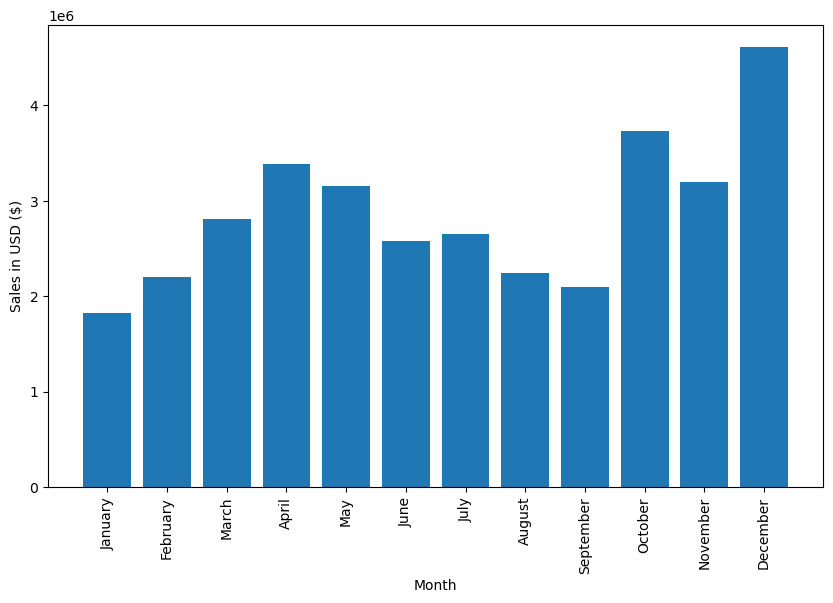

In [15]:
import calendar
import matplotlib.pyplot as plt
months = range(1, 13)
month_names = [calendar.month_name[i] for i in months]

plt.figure(figsize=(10, 6))
plt.bar(month_names, all_data.groupby(['Month']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month')
plt.xticks(rotation=90) 
plt.show()

#### Best selling month is December. Sales for that month is $4613443.

### Q2. Which city had the highest number of sales, and which product generated the maximum revenue?

In [16]:
all_data.groupby(['City'])[['Quantity Ordered','Sales']].sum()

,Quantity Ordered,Sales
City,,
Atlanta (GA),16602,2795498.58
Austin (TX),11153,1819581.75
Boston (MA),22528,3661642.01
Dallas (TX),16730,2767975.40
Los Angeles (CA),33289,5452570.80
New York City (NY),27932,4664317.43
Portland (ME),2750,449758.27
Portland (OR),11303,1870732.34
San Francisco (CA),50239,8262203.91


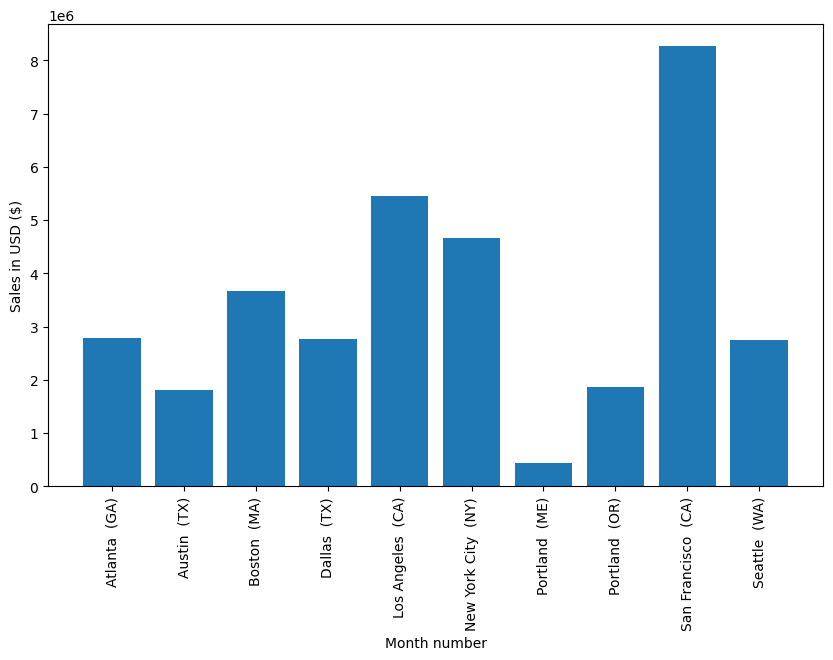

In [17]:
keys = [city for city, df in all_data.groupby(['City'])]
plt.figure(figsize=(10, 6))
plt.bar(keys,all_data.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.xticks(keys, rotation=90)
plt.show()

In [18]:
sf_data = all_data[all_data['City'].str.contains('San Francisco')]

product_sales = sf_data.groupby('Product').agg({'Quantity Ordered': 'sum', 'Sales': 'sum'}).reset_index()

top_products = product_sales.sort_values(by='Sales', ascending=False)

print(top_products)

                       Product  Quantity Ordered       Sales
13          Macbook Pro Laptop              1136  1931200.00
18                      iPhone              1661  1162700.00
14             ThinkPad Laptop               963   962990.37
9                 Google Phone              1358   814800.00
1       27in 4K Gaming Monitor              1460   569385.40
6     Apple Airpods Headphones              3733   559950.00
3       34in Ultrawide Monitor              1446   549465.54
8                Flatscreen TV              1154   346200.00
7   Bose SoundSport Headphones              3317   331666.83
2             27in FHD Monitor              1814   272081.86
16             Vareebadd Phone               494   197600.00
0                 20in Monitor              1000   109990.00
11          LG Washing Machine               180   108000.00
10                    LG Dryer               143    85800.00
12    Lightning Charging Cable              5557    83077.15
15        USB-C Charging

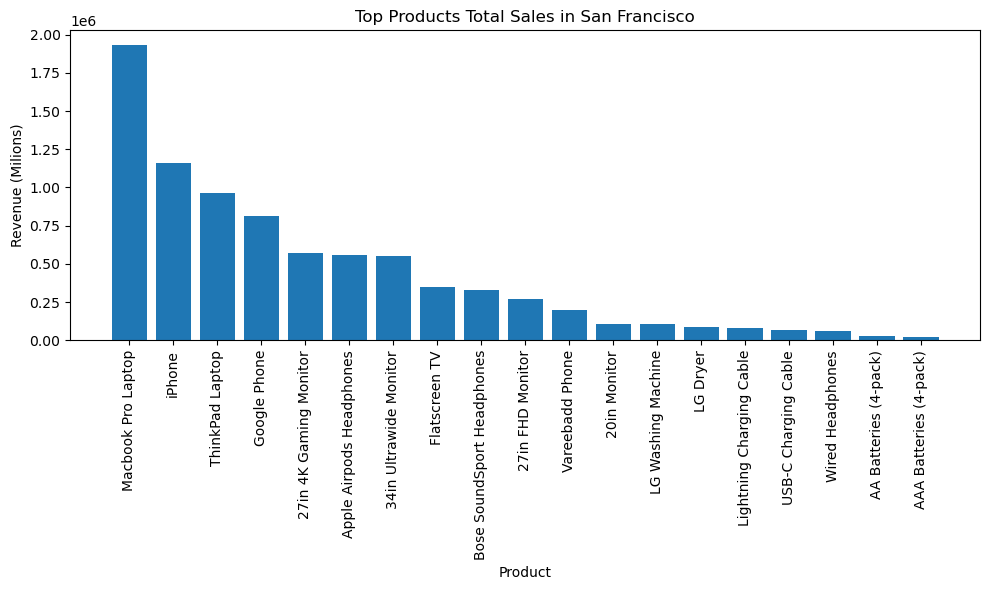

Product with the Most Revenue in San Francisco: Macbook Pro Laptop
Total Revenue: 1931200.0


In [19]:
plt.figure(figsize=(10, 6))
plt.bar(top_products['Product'], top_products['Sales'])
plt.xlabel('Product')
plt.ylabel('Revenue (Milions)')
plt.title('Top Products Total Sales in San Francisco')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

sf_data = all_data[all_data['City'].str.contains('San Francisco')]

product_revenue = sf_data.groupby('Product')['Sales'].sum().reset_index()

most_revenue_product = product_revenue.loc[product_revenue['Sales'].idxmax()]

print("Product with the Most Revenue in San Francisco:", most_revenue_product['Product'])
print("Total Revenue:", most_revenue_product['Sales'])

#### Product with the Most Revenue in San Francisco: Macbook Pro Laptop with Total Revenue: 1931200.0

### Q3. At what time should advertisements be displayed?

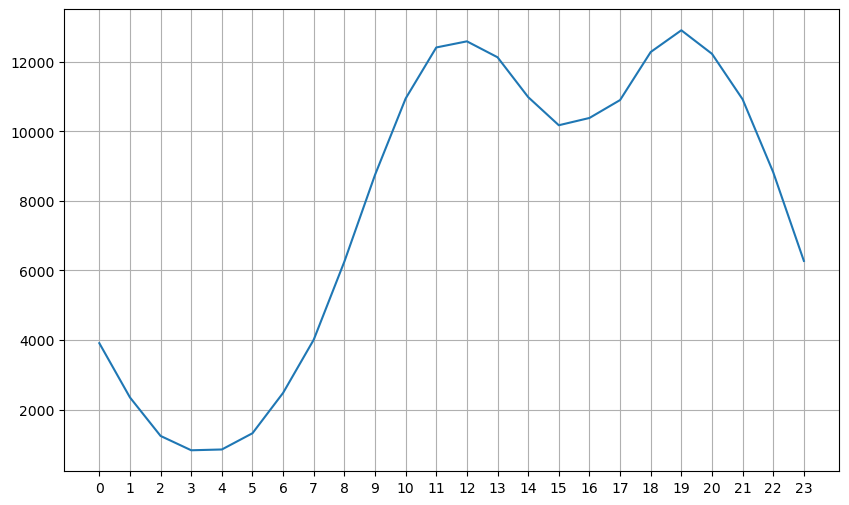

In [20]:
keys = [pair for pair, df in all_data.groupby(['Hour'])]
all_data['Count'] = 1
plt.figure(figsize=(10, 6))
plt.plot(keys, all_data.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.show()


#### Best time to show advertisement is 10:30 to 13 and 17:30 to 20:30.

### Q4. Which products are commonly sold together?

In [21]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

# Referenced taken from: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

In [22]:
# Referenced taken from: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary

from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### The following product pairs have emerged as the best-selling combinations, each with its corresponding sales count: <br>iPhone & Lightning Charging Cable - Sold 1005 times.<br> Google Phone & USB-C Charging Cable - Sold 987 times.<br>iPhone & Wired Headphones - Sold 447 times. <br>These pairs of products have demonstrated remarkable sales performance and popularity among customers.

### Q5. Which product is the best-selling?

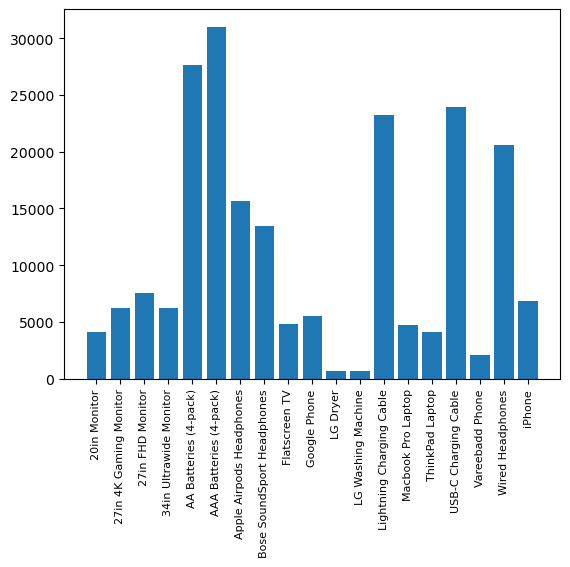

In [23]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

#### AA and AAA batteries stand out as the top-selling items, demonstrating their high demand. Following closely are products like the Lightning Charging Cable, USB-C Charging Cable, and Wired Headphones have sales traction after batteries.

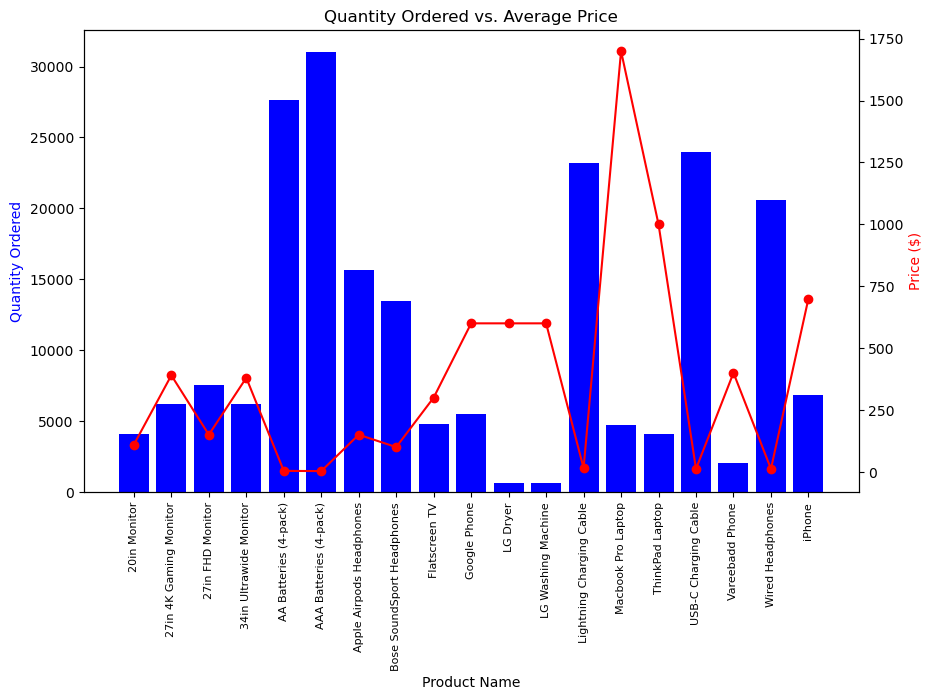

In [24]:
prices = all_data.groupby('Product')['Price Each'].mean()
fig, ax1 = plt.subplots(figsize=(10,6))
ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='b')
ax2.plot(keys, prices, color='r', marker='o')
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='b')
ax2.set_ylabel('Price ($)', color='r')
ax1.set_xticks(range(len(keys)))
ax1.set_xticklabels(keys, rotation='vertical', size=8)
plt.title('Quantity Ordered vs. Average Price')
plt.show()